<a href="https://colab.research.google.com/github/ZAMetzger/AppliedML/blob/main/Project1_ZoeMetzger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this is for displaying plots with high resolution
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [2]:
import random


# Project 1
## Question 1:
If you are rolling 5 dice, determine the probability that the sum of the faces showing up is equal to 21.


In [3]:
# P(21) = D1 + D2 + D3 + D4 + D5


0.0692927

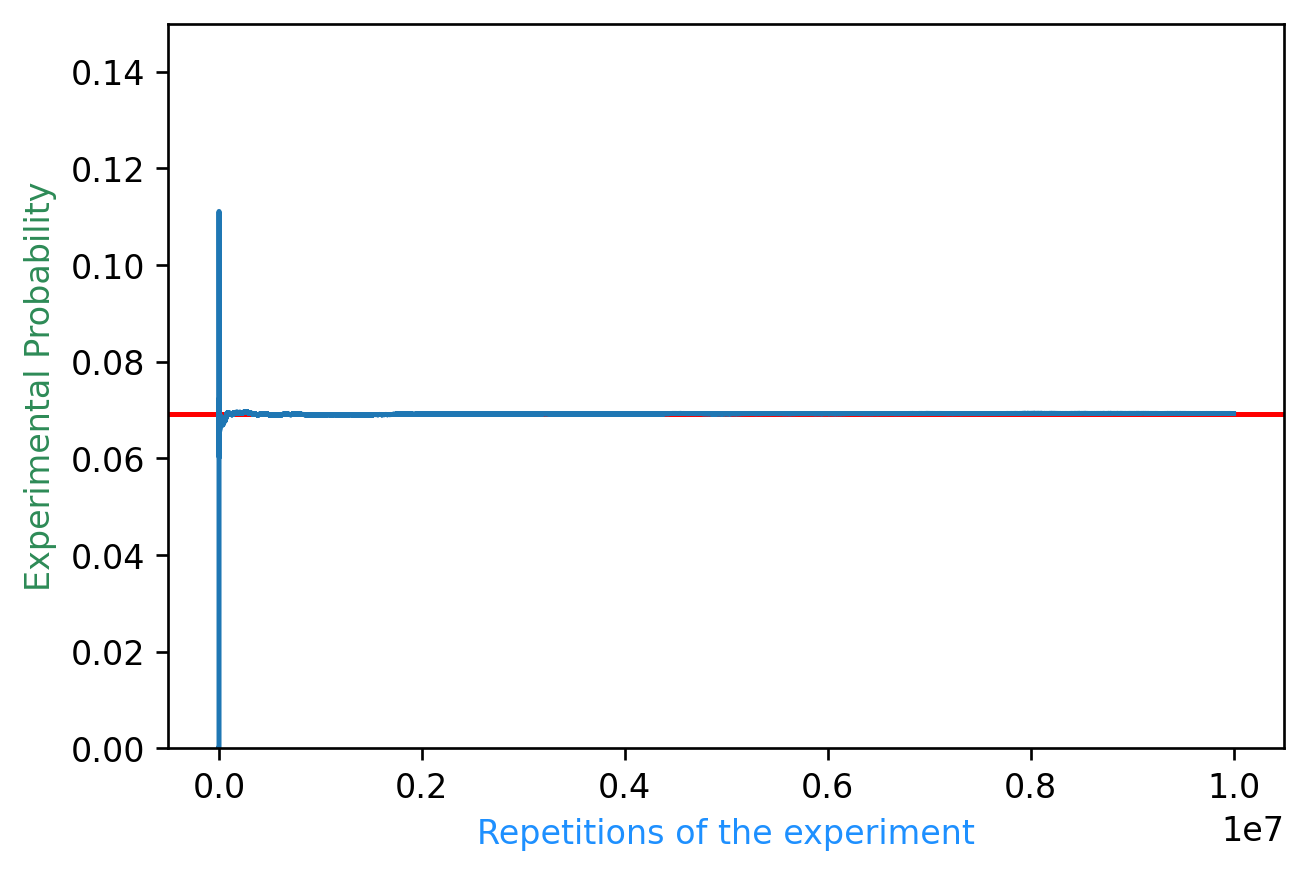

In [23]:
def die_roll():
  return random.randint(1,6)

listp = []
 
# create the Monte Carlo simulation function
def monte_carlo(n):
  win = 0;
  for i in range(n):
    sum = 0
    for j in range(5):
      sum = sum + die_roll()
    if sum is 21:
      win = win + 1
 
    #compute probability
    prob_val = win/(i+1)
 
    # update the list of probability values
    listp.append(prob_val)
 
  return win/n
 
answer = monte_carlo(10000000)
 
# plot the results
 
plt.axhline(y=answer, color = 'red')
plt.plot(listp)
plt.ylim([0,0.15])
plt.xlabel("Repetitions of the experiment",color='dodgerblue')
plt.ylabel("Experimental Probability",color='seagreen')

answer

The probability the 5 dice will add up to 21 is 6.94%

## Question 2
You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 1/3 chance of telling you the truth and, the other two have 1/4 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining in Boston?

In [13]:
#Friend 1 and 2 chance of lying 2/3
#Friend 3 and 4 chance of lying 1/4

In [26]:
from numpy import float32
friend12 = [1,0,0]
friend34 = [1,1,1,0]
def monte_carlo(n):
  truth = 0;
  lies = 0;
  for i in range(n):
     random.shuffle(friend12)
     random.shuffle(friend34)

     f1 = random.randrange(3)
     f3 = random.randrange(4)

     random.shuffle(friend12)
     random.shuffle(friend34)

     f2 = random.randrange(3)
     f4 = random.randrange(4)

     if f1 == 0 and f3 == 0 and f3 == 0 and f4 == 0:
       lies += 1
    
     else:
       truth +=1
 
  return lies/n, truth/n
 
answer = monte_carlo(100000)
 

answer

(0.0208, 0.9792)

There is a 2.08% chance all friends are lying to you at the same time and that it is raining in Boston.


## Question 3
Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

| Route                                            | Length of Route (miles) |
| ------------------------------------------------ | ----------------------- |
| New York - Atlanta                               | 866                     |
| New York - Nashville | 900                     |
| Nashville - St. Louis                            | 309                     |
| Nashville - New Orleans                          | 532                     |
| Atlanta - St. Louis                              | 555                     |
| Atlanta - New Orleans                            | 470                     |
| St. Louis - Dallas                               | 662                     |
| New Orleans - Dallas                             | 505                     |


In [27]:
atlanta_sl = 866+555+662
atlanta_no = 866+470+505
nash_sl=900+309+662
nash_no = 900+532+505

In [28]:
print(atlanta_sl, atlanta_no, nash_no, nash_sl)

2083 1841 1937 1871


In [29]:
nash = [nash_sl,nash_no]
atlanta = [atlanta_sl, atlanta_no]

nash_win_probability = []
atl_win_probability = []

def monte_carlo(n):

  nash_wins = 0
  atl_wins = 0
  nash_dist_sum = 0
  atl_dist_sum = 0

  for i in range(n):
     random.shuffle(nash)
     random.shuffle(atlanta)

     k = random.randrange(2)

     if nash[k] > atlanta[k]:
       atl_wins += 1
    
     else:
       nash_wins +=1
    
     nash_win_probability.append(nash_wins/(i+1))
     atl_win_probability.append(atl_wins/(i+1))

     nash_dist_sum += nash[k]
     atl_dist_sum += atlanta[k]

  '''  
     plt.plot(nash_win_probability)
     plt.plot(atl_win_probability)
     plt.tick_params(axis='x', colors='navy')
     plt.tick_params(axis='y', colors='navy')
     plt.xlabel('Repetitions of Experiment',fontsize=14,color='green')
     plt.ylabel('Experimental Probability',fontsize=14,color='green')
  '''
  print('Winning probability if you always pick Nashville:', nash_win_probability[-1], nash_dist_sum/n)
  print('Winning probability if you always pick Atlanta:', atl_win_probability[-1], atl_dist_sum/n)

monte_carlo(100000)

Winning probability if you always pick Nashville: 0.50035 1903.84358
Winning probability if you always pick Atlanta: 0.49965 1962.0847


Nashville is the best path. Even though the probability of picking Nashville or Atlata and going the shortest path is 50/50, the distance traveled has the chance of being shorter more oftern with Nashville. This is represented by the nash_dist_sum and the atl_dist_sum. The average path for nashville is shorter.